# Compare the algorithm results to the ground truth classification data

Processing that uses the pre-created pickle file of comparison data for the various approaches, and compares the classified data to the ground truth data that was originally classified

In [1]:
import pandas as pd

compare_data = pd.read_pickle('../../TestPredictions/evaluate_algo_data.pkl')

## Step 1: Add a matched column

Add a numeric 1 or 0 indicating whether the specific line in the data matches with the original classification or not

In [4]:
compare_data['matched'] = 0
compare_data.loc[compare_data['tile_class'] == compare_data['ground_truth'], 'matched'] = 1
compare_data

,tile_x,tile_y,tile_class,algorithm_type,algorithm,image_size,image_id,Foliage,Water,Building,...,test_case,ground_truth,Video_File,File_ID,Date,Time,Time_From_Daylight_Start,Time_To_Daylight_End,Conditions,matched
0,0,0,water,cnn,hires,test-large,DJI_0099200,0.000000,1.000000,0.000000,...,120m_altitude,road,DJI_0099.MP4,DJI_0099,03/05/2020,11:40,5.77,9.40,Partly_Cloudy,0
1,0,0,road,cnn,hires,test-medium,DJI_0099200,0.000000,0.000000,0.000000,...,120m_altitude,road,DJI_0099.MP4,DJI_0099,03/05/2020,11:40,5.77,9.40,Partly_Cloudy,1
2,0,0,road,cnn,hires,test-small,DJI_0099200,0.000000,0.000000,0.000000,...,120m_altitude,road,DJI_0099.MP4,DJI_0099,03/05/2020,11:40,5.77,9.40,Partly_Cloudy,1
3,0,0,water,cnn,lowres,test-large,DJI_0099200,0.000000,1.000000,0.000000,...,120m_altitude,road,DJI_0099.MP4,DJI_0099,03/05/2020,11:40,5.77,9.40,Partly_Cloudy,0
4,0,0,road,cnn,lowres,test-medium,DJI_0099200,0.000000,0.000000,0.257732,...,120m_altitude,road,DJI_0099.MP4,DJI_0099,03/05/2020,11:40,5.77,9.40,Partly_Cloudy,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14017459,127,71,foliage,cnn,lowres,test-medium,DJI_0155400,1.000000,0.000000,0.000000,...,35m_altitude,foliage,DJI_0155.MP4,DJI_0155,04/07/2020,14:06,9.12,8.08,Cloudy,1
14017460,127,71,foliage,cnn,lowres,test-small,DJI_0155400,1.000000,0.000000,0.000000,...,35m_altitude,foliage,DJI_0155.MP4,DJI_0155,04/07/2020,14:06,9.12,8.08,Cloudy,1
14017461,127,71,foliage,ilastik,default,test-large,DJI_0155400,0.749568,0.006906,0.071655,...,35m_altitude,foliage,DJI_0155.MP4,DJI_0155,04/07/2020,14:06,9.12,8.08,Cloudy,1
14017462,127,71,foliage,ilastik,default,test-medium,DJI_0155400,0.768778,0.011556,0.058000,...,35m_altitude,foliage,DJI_0155.MP4,DJI_0155,04/07/2020,14:06,9.12,8.08,Cloudy,1


## Step 2: Evaluate statistical characteristics of the classification data

Evaluate the distribution of probabilities for the different categories, compare between the different classification algorithms

Text(0.5, 1.0, 'CNN - Foliage')

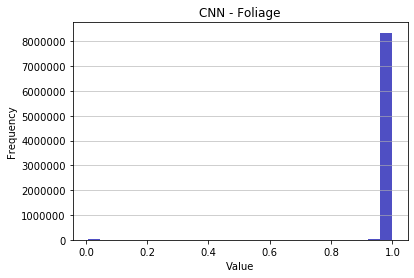

In [55]:
import matplotlib.pyplot as plt
import numpy as np 

# Plot a histogram for the probabilities of a cell being foliage when classified by a CNN
n, bins, patches = plt.hist(x=compare_data.loc[(compare_data.algorithm_type == 'cnn') & 
                                               (compare_data.Foliage > 0), 'Foliage'], 
                            bins='auto', color='#0504aa', alpha=0.7)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('CNN - Foliage')


Text(0.5, 1.0, 'CNN - Water')

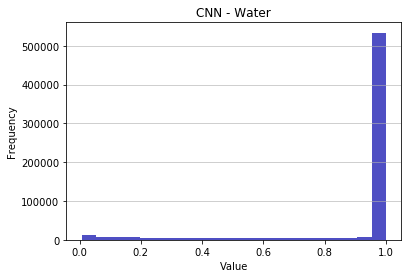

In [54]:
# Plot a histogram for the probabilities of a cell being Water when classified by a CNN
n, bins, patches = plt.hist(x=compare_data.loc[(compare_data.algorithm_type == 'cnn') &
                                               (compare_data.Water > 0), 'Water'], 
                            bins='auto', color='#0504aa', alpha=0.7)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('CNN - Water')


Text(0.5, 1.0, 'CNN - Road')

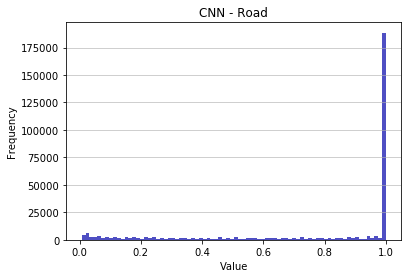

In [56]:
# Plot a histogram for the probabilities of a cell being Water when classified by a CNN
n, bins, patches = plt.hist(x=compare_data.loc[(compare_data.algorithm_type == 'cnn') & 
                                               (compare_data.Road > 0), 'Road'], 
                            bins='auto', color='#0504aa', alpha=0.7)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('CNN - Road')

Text(0.5, 1.0, 'CNN - Building')

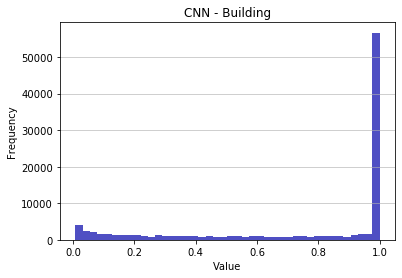

In [52]:
# Plot a histogram for the probabilities of a cell being Water when classified by a CNN
n, bins, patches = plt.hist(x=compare_data.loc[(compare_data.algorithm_type == 'cnn') & 
                                               (compare_data.Building > 0), 'Building'], 
                            bins='auto', color='#0504aa', alpha=0.7)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('CNN - Building')

Text(0.5, 1.0, 'Ilastik - Foliage')

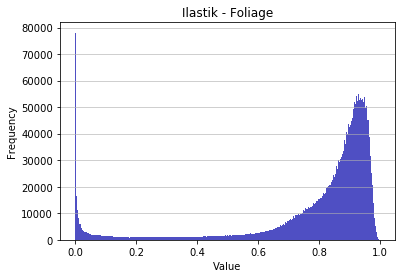

In [40]:
# Plot a histogram for the probabilities of a cell being foliage when classified by Ilastik
n, bins, patches = plt.hist(x=compare_data.loc[compare_data.algorithm_type == 'ilastik', 'Foliage'], bins='auto', color='#0504aa',
                            alpha=0.7)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Ilastik - Foliage')

Text(0.5, 1.0, 'Ilastik - Water')

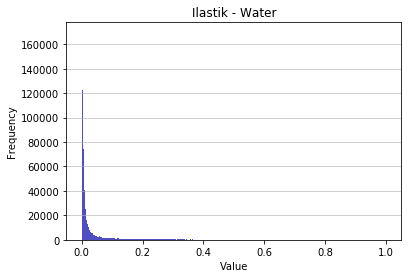

In [57]:
# Plot a histogram for the probabilities of a cell being foliage when classified by Ilastik
n, bins, patches = plt.hist(x=compare_data.loc[(compare_data.algorithm_type == 'ilastik') & 
                                               (compare_data.Water > 0), 'Water'], 
                            bins='auto', color='#0504aa', alpha=0.7)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Ilastik - Water')

Text(0.5, 1.0, 'Ilastik - Road')

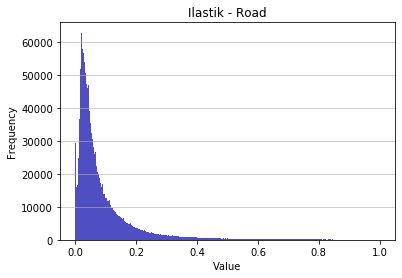

In [58]:
# Plot a histogram for the probabilities of a cell being foliage when classified by Ilastik
n, bins, patches = plt.hist(x=compare_data.loc[(compare_data.algorithm_type == 'ilastik') & 
                                               (compare_data.Road > 0), 'Road'], 
                            bins='auto', color='#0504aa', alpha=0.7)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Ilastik - Road')

Text(0.5, 1.0, 'Ilastik - Building')

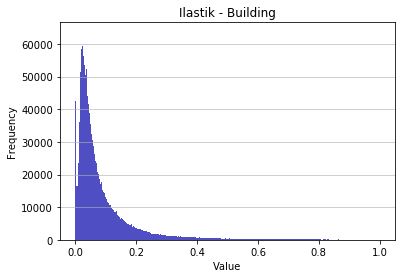

In [45]:
# Plot a histogram for the probabilities of a cell being foliage when classified by Ilastik
n, bins, patches = plt.hist(x=compare_data.loc[compare_data.algorithm_type == 'ilastik', 'Road'], bins='auto', color='#0504aa',
                            alpha=0.7)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Ilastik - Building')

In [ ]:
TODO: Statistical look at probability value differences between algorithms

In [ ]:
category_grouped = compare_data.groupby(['algorithm_type', 'algorithm', 'test_case', 'image_size'])['matched'].agg(['sum','count'])
category_grouped = category_grouped.reset_index()
category_grouped['percentage_match'] = category_grouped['sum'] / category_grouped['count'] * 100
category_grouped['algo'] = category_grouped['algorithm_type'] + " " + category_grouped['algorithm']
category_grouped
df = category_grouped.sort_values(['algo', 'image_size'])
di_test_case = {"120m_altitude": "120m", "35m_altitude": "035m", "55m_altitude": "055m", "different_angle": "angl"}
df.test_case = df.test_case.replace(di_test_case)
di_img_size = {"test-large": "lg", "test-medium": "med", "test-small": "sm"}
df.image_size = df.image_size.replace(di_img_size)
df.algo = df.algo.replace({"ilastik default": "ilastik"})
df = df.sort_values(['algo', 'test_case'])
df['test_group'] = df['test_case'] + " " + df['image_size']
df = df.pivot(index='test_group', columns='algo', values='percentage_match')
df.plot.line()

In [ ]:
TODO: AUC chart